In [ ]:
# !kaggle competitions download -c cat-in-the-dat

## 필요한 모듈 불러오기

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
PATH = "./cat-in-the-dat/"

In [6]:
train = pd.read_csv(os.path.join(PATH,'train.csv'), index_col='id')
test = pd.read_csv(os.path.join(PATH,'test.csv'), index_col='id')

### 피처별 데이터 타입 DataFrame 생성

In [24]:
def resumetable(df):
    print('데이터 세트 형상: {}'.format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    # 인덱스 재설정 후 열 이름 변경
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    # 결측값 개수, 고유값 개수, 1-3행 입력값 추가
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

In [25]:
resumetable(train)

데이터 세트 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


## EDA

#### 데이터 살펴보기

In [26]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [30]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [29]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


#### 피처 요약표 해석하기

In [32]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고유값: {train[feature].unique()}')

ord_0 고유값: [2 1 3]
ord_1 고유값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [33]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고유값: {train[feature].unique()}')

ord_3 고유값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [34]:
resumetable(train)

데이터 세트 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [36]:
print('day 고유값', train['day'].unique()) # 요일 변수
print('month 고유값', train['month'].unique())
print('target 고유값', train['target'].unique())

day 고유값 [2 7 5 4 3 1 6]
month 고유값 [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고유값 [0 1]


### 데이터 시각화

#### target Distribution

[Text(0.5, 1.0, 'Target Distribution')]

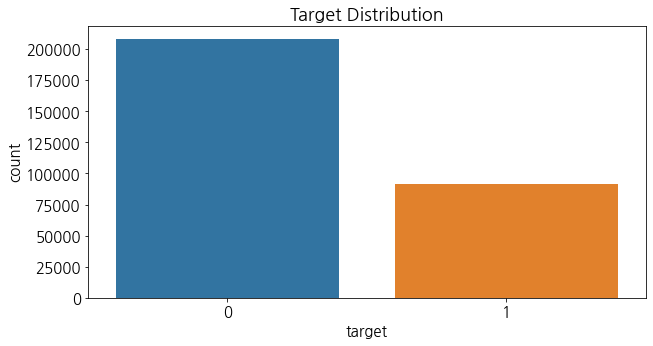

In [38]:
mpl.rc('font', size = 15) # 폰트 크기 설정

plt.figure(figsize=(10,5))
ax = sns.countplot(x='target', data = train)
ax.set(title='Target Distribution')

In [43]:
train['target'].value_counts()

0    208236
1     91764
Name: target, dtype: int64

train의 target 데이터에는 0이 약 2만개, 1이 만개정도 존재한다.

In [44]:
rectangle = ax.patches[0] # 첫번째 Rectangle 객체
print('사각형 높이: ', rectangle.get_height())
print('사각형 너비: ', rectangle.get_width())
print('사각형 왼쪽 테두리 x축 위치: ', rectangle.get_x())

사각형 높이:  208236
사각형 너비:  0.8
사각형 왼쪽 테두리 x축 위치:  -0.4


In [45]:
rectangle = ax.patches[1] # 두번째 Rectangle 객체
print('사각형 높이: ', rectangle.get_height())
print('사각형 너비: ', rectangle.get_width())
print('사각형 왼쪽 테두리 x축 위치: ', rectangle.get_x())

사각형 높이:  91764
사각형 너비:  0.8
사각형 왼쪽 테두리 x축 위치:  0.6


Text(0.5, 1.0, 'Target Distribution - Percent')

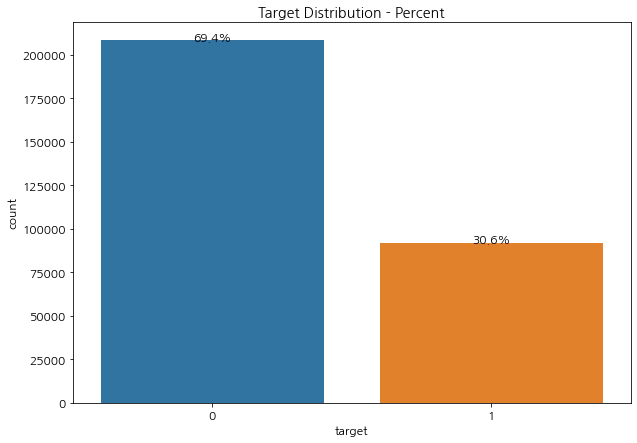

In [82]:
# 도형 객체 순회하며 막대 상단에 타깃값 비율 표시
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size*100
        
        # (x,y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, #y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
               ha= 'center')                   # 가운데 정렬
plt.figure(figsize=(10,7))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution - Percent')

#### Binary Feature Distribution ( bin_0 ~ bin4 )

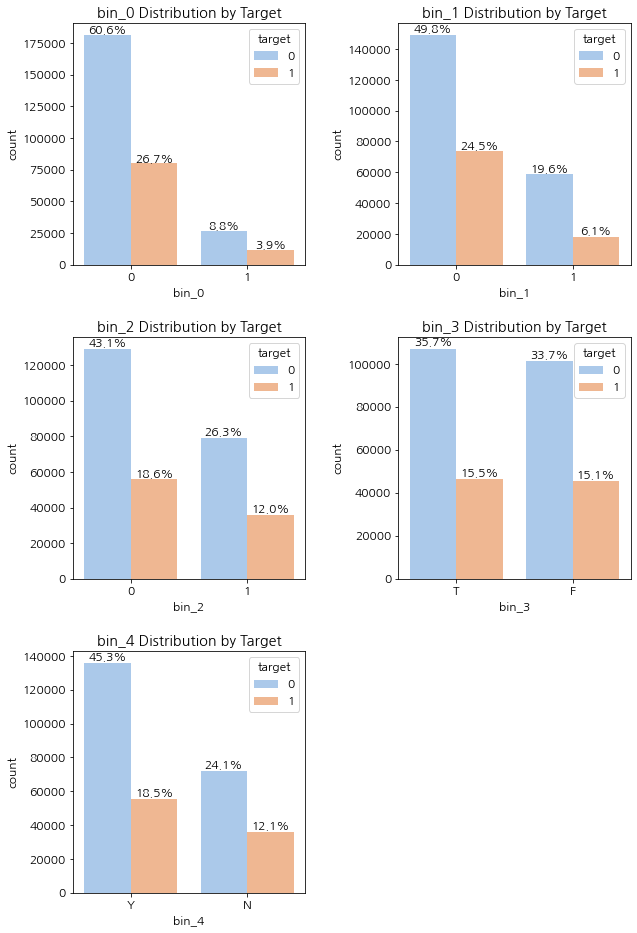

In [55]:
import matplotlib.gridspec as gridspec # 여러 그래프 격자 형태로 표시

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3,2) # 3행 2열 서브플롯 배치
plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=train,
                 hue='target',
                 palette='pastel',
                 ax=ax)
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

#### Nominal Feature Distribution(nom_0~nom_4)

In [61]:
# 교차분석표 생성 함수
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [74]:
# 포인트플롯 생성 함수
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                       order=crosstab[feature].values, # 포인트플롯 순서
                       color='black', # 포인트플롯 색상
                       legend=False) # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [75]:
# 피처 분포도 및 피처별 타겟값 1의 비율 포인트플롯 생성 함수
def plot_cat_dist_with_true_ratio(df, feature, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
    
    for idx, feature in enumerate(feature):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x=feature, data=df,
                     order=crosstab[feature].values,
                     color='skyblue',
                     ax=ax)
        write_percent(ax,len(df))
        
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f'{feature} Distribution')

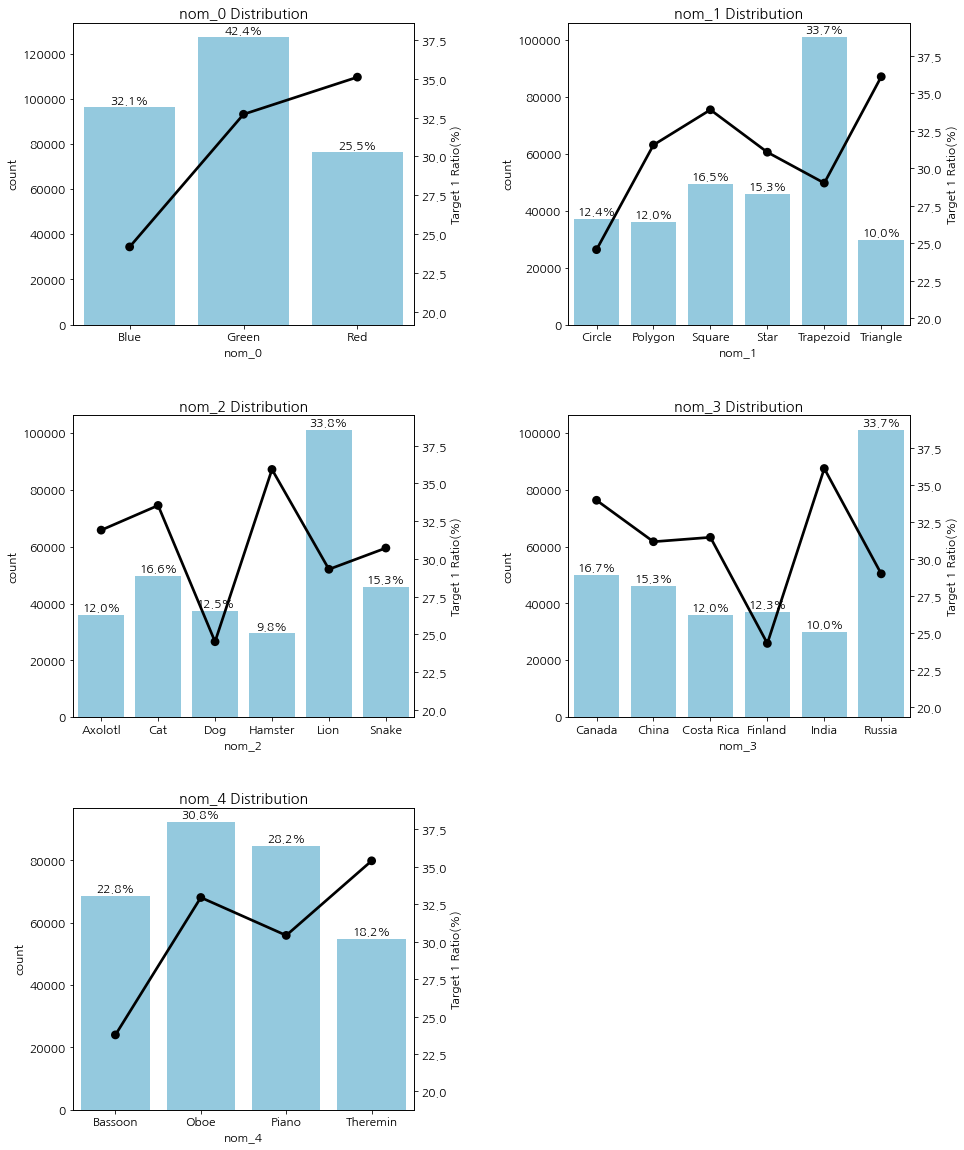

In [76]:
nom_features = ['nom_0','nom_1','nom_2','nom_3','nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

#### Ordinal Feature Distribution (ord_0~ord_3)

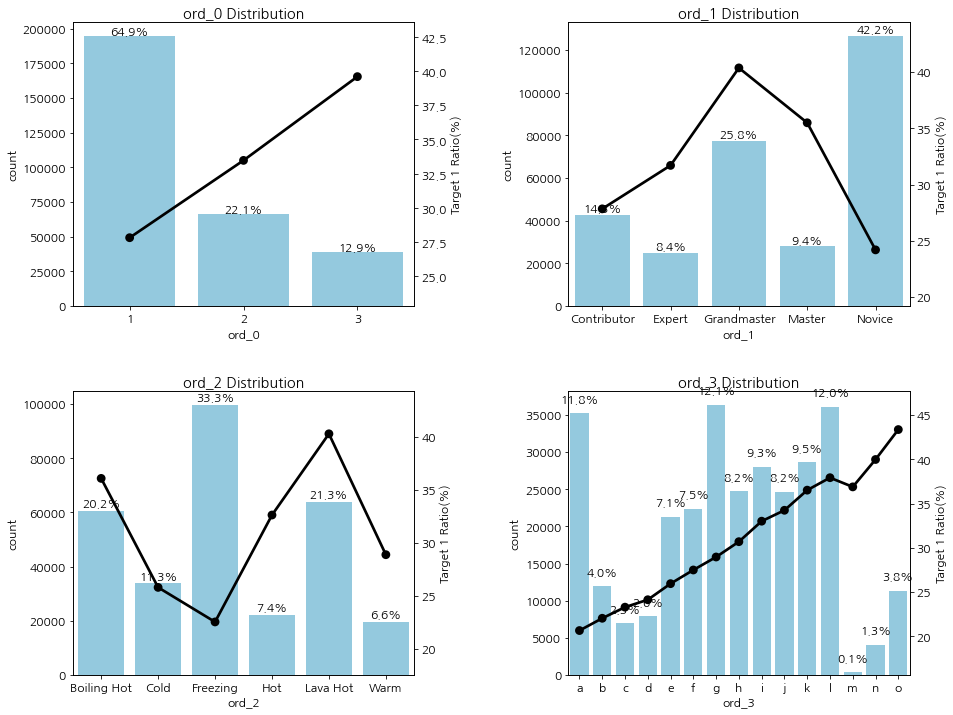

In [77]:
ord_features = ['ord_0','ord_1','ord_2','ord_3']
plot_cat_dist_with_true_ratio(train, ord_features,
                             num_rows=2, num_cols=2, size=(15,12))

In [79]:
# 순서 지정하기
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', "Boiling Hot", "Lava Hot"]

# 순서 지정한 범주형 데이터 타입
ord_1_type = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_type = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_type)
train['ord_2'] = train['ord_2'].astype(ord_2_type)

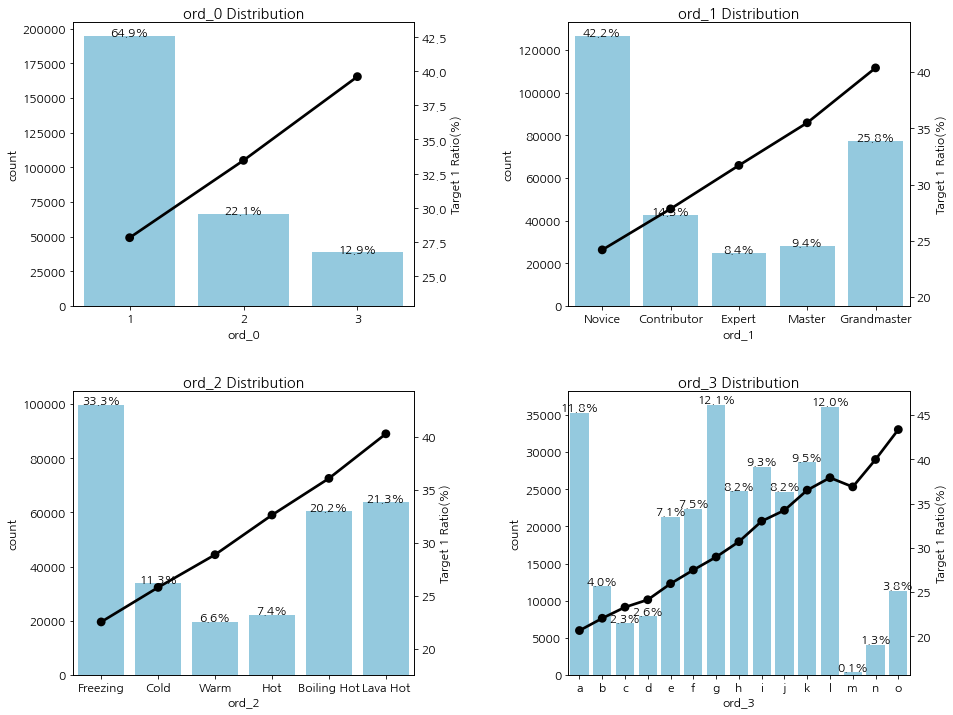

In [83]:
plot_cat_dist_with_true_ratio(train, ord_features,
                             num_rows=2, num_cols=2, size=(15,12))

순서형 피처의 경우 순차적으로 Target1의 값이 증가하는 것을 알 수 있다.

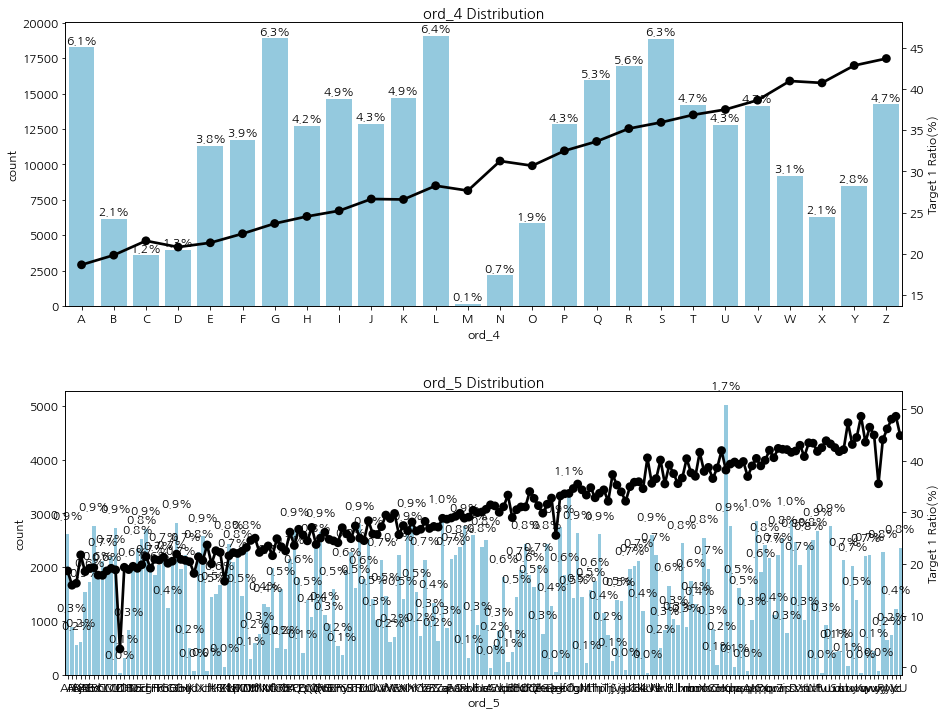

In [84]:
plot_cat_dist_with_true_ratio(train, ['ord_4','ord_5'],
                             num_rows=2, num_cols=1, size=(15,12))

#### Day Feature Distribution

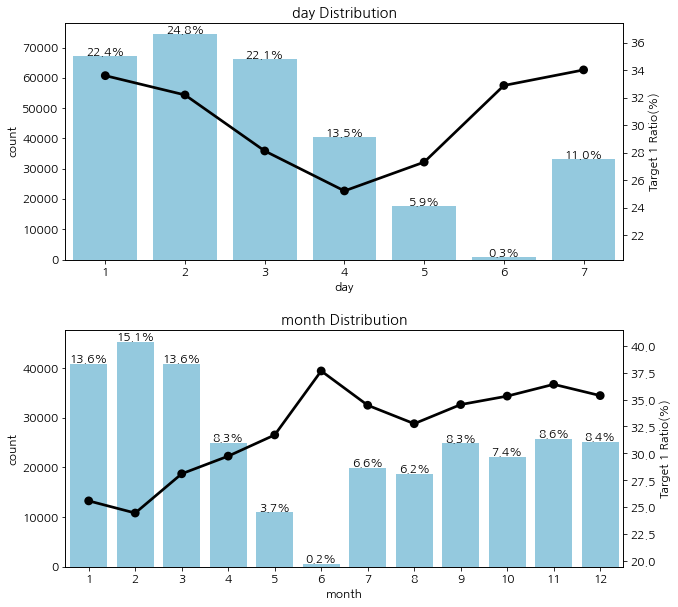

In [85]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features,
                             num_rows=2, num_cols=1, size=(10,10))